# Library Imports

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
# import warnings
# warnings.filterwarnings('ignore')
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

import os
print(os.getcwd())


/home/jovyan/playground/kaggle-exercises


# Data Prep

## Import dataset

In [3]:
df = pd.read_csv('Procurement KPI Analysis Dataset.csv')

In [17]:
df.shape

(777, 11)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   PO_ID             777 non-null    object 
 1   Supplier          777 non-null    object 
 2   Order_Date        777 non-null    object 
 3   Delivery_Date     690 non-null    object 
 4   Item_Category     777 non-null    object 
 5   Order_Status      777 non-null    object 
 6   Quantity          777 non-null    int64  
 7   Unit_Price        777 non-null    float64
 8   Negotiated_Price  777 non-null    float64
 9   Defective_Units   641 non-null    float64
 10  Compliance        777 non-null    object 
dtypes: float64(3), int64(1), object(7)
memory usage: 66.9+ KB


In [4]:
df.sample(10)

,PO_ID,Supplier,Order_Date,Delivery_Date,Item_Category,Order_Status,Quantity,Unit_Price,Negotiated_Price,Defective_Units,Compliance
4,PO-00005,Delta_Logistics,2022-09-08,2022-09-20,Raw Materials,Delivered,1180,64.07,60.53,171.0,No
177,PO-00178,Beta_Supplies,2023-07-07,2023-07-18,Office Supplies,Cancelled,1078,18.34,17.41,102.0,Yes
248,PO-00249,Epsilon_Group,2023-08-08,2023-08-20,Packaging,Delivered,698,46.73,45.61,15.0,Yes
601,PO-00602,Alpha_Inc,2023-12-15,2023-12-30,Office Supplies,Delivered,1131,33.35,31.28,23.0,Yes
307,PO-00308,Alpha_Inc,2023-03-10,2023-03-25,Electronics,Delivered,1910,90.69,85.80,NaN,Yes
297,PO-00298,Alpha_Inc,2022-08-07,2022-08-10,Office Supplies,Delivered,296,40.38,35.25,NaN,Yes
48,PO-00049,Delta_Logistics,2022-02-14,2022-03-05,Office Supplies,Pending,1007,52.44,46.06,167.0,Yes
233,PO-00234,Delta_Logistics,2023-10-09,2023-10-18,Electronics,Delivered,1304,32.08,29.36,NaN,Yes
287,PO-00288,Beta_Supplies,2022-02-21,2022-03-13,Packaging,Delivered,434,36.16,34.79,41.0,Yes
726,PO-00727,Gamma_Co,2022-12-12,2022-12-30,Electronics,Delivered,1148,17.78,17.16,61.0,Yes


In [5]:
df.describe()

,Quantity,Unit_Price,Negotiated_Price,Defective_Units
count,777.000000,777.000000,777.000000,641.000000
mean,1094.660232,58.283822,53.660721,74.803432
std,647.844551,28.101315,26.094930,69.187870
min,51.000000,10.840000,9.270000,0.000000
25%,615.000000,33.290000,30.460000,26.000000
50%,1075.000000,58.950000,53.800000,49.000000
75%,1548.000000,83.130000,76.550000,100.000000
max,5000.000000,109.170000,107.390000,321.000000


In [18]:
df.dtypes

PO_ID                object
Supplier             object
Order_Date           object
Delivery_Date        object
Item_Category        object
Order_Status         object
Quantity              int64
Unit_Price          float64
Negotiated_Price    float64
Defective_Units     float64
Compliance           object
dtype: object

In [7]:
df.isnull().sum()

PO_ID                 0
Supplier              0
Order_Date            0
Delivery_Date        87
Item_Category         0
Order_Status          0
Quantity              0
Unit_Price            0
Negotiated_Price      0
Defective_Units     136
Compliance            0
dtype: int64

In [14]:
df.duplicated().sum()

np.int64(0)

# Data visualizations

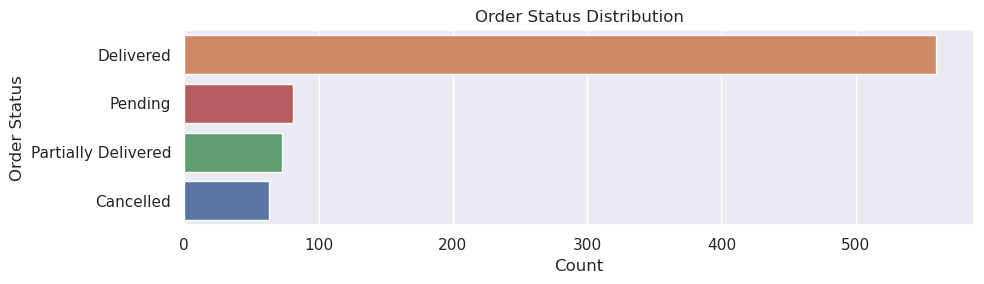

In [91]:
sns.set(style='darkgrid', palette='deep')

# 1. 0,0 Order Status Distribution
plt.figure(figsize=(10,3))
sns.countplot(data=df, y='Order_Status', order=df['Order_Status'].value_counts().index, hue='Order_Status')
plt.title('Order Status Distribution')
plt.ylabel('Order Status')
plt.xlabel('Count')
plt.tight_layout()
plt.show()

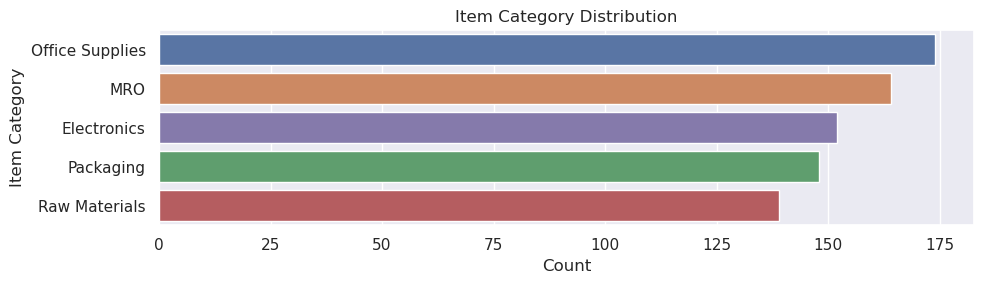

In [93]:
# 2. 0,1 Item Category Distribution
plt.figure(figsize=(10,3))
sns.countplot(data=df, y='Item_Category', order=df['Item_Category'].value_counts().index, hue='Item_Category')
plt.title('Item Category Distribution')
plt.ylabel('Item Category')
plt.xlabel('Count')
plt.tight_layout()
plt.show()

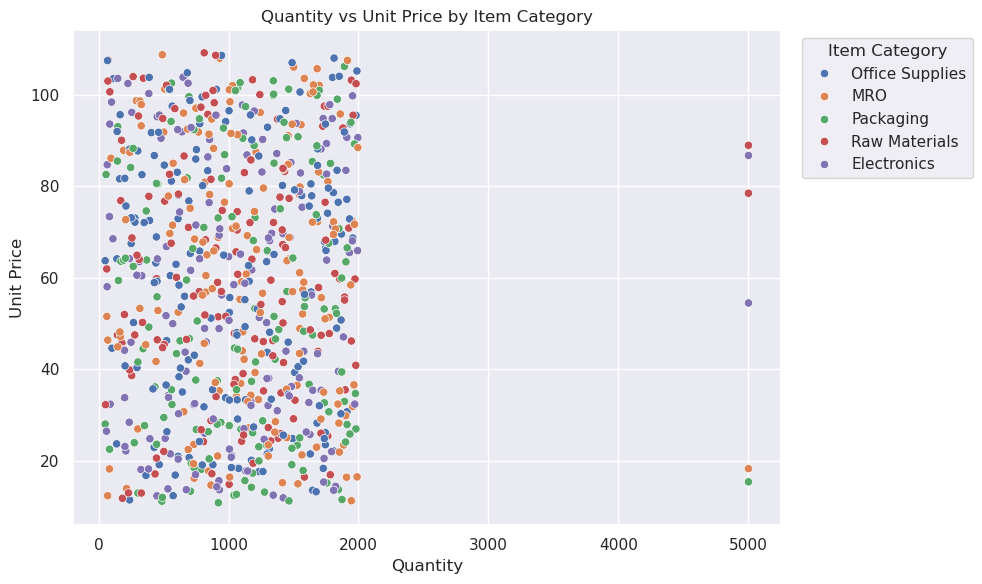

In [87]:
# 3. Quantity vs Unit_Price Scatter Plot
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='Quantity', y='Unit_Price',  hue='Item_Category')
plt.title('Quantity vs Unit Price by Item Category')
plt.xlabel('Quantity')
plt.ylabel('Unit Price')
plt.legend(title='Item Category', loc='upper left', bbox_to_anchor=(1.02,1))
plt.tight_layout()
plt.show()

In [95]:
pd.to_datetime(df['Delivery_Date'])

0     2023-10-25
1     2022-05-05
2     2022-02-15
3     2022-10-28
4     2022-09-20
         ...    
772   2023-02-20
773          NaT
774   2022-04-07
775   2023-09-11
776   2023-12-11
Name: Delivery_Date, Length: 777, dtype: datetime64[ns]

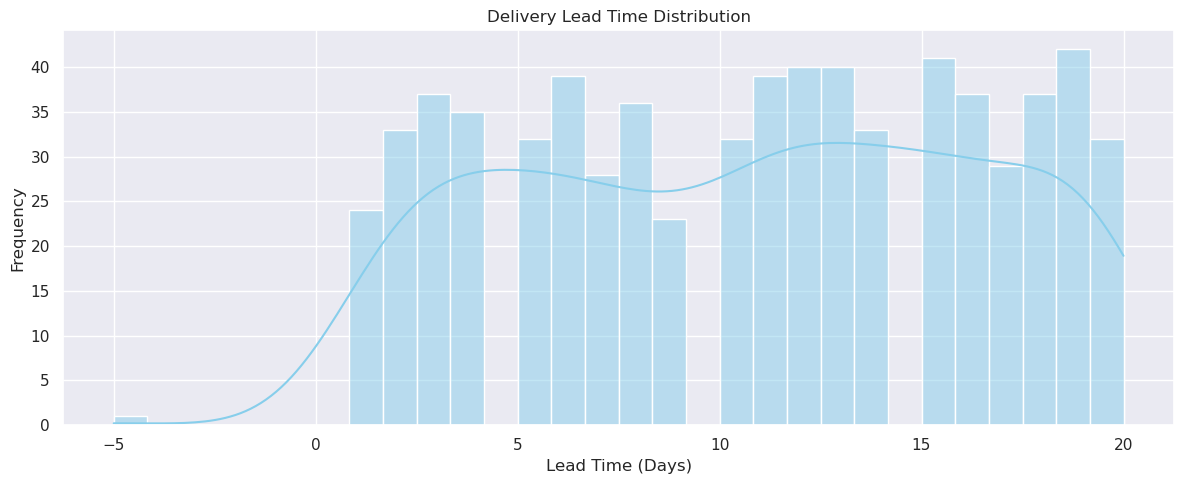

In [120]:
# 4. Delivery Lead Time (Days) Analysis
df['Order_Date'] = pd.to_datetime(df['Order_Date']) #Convert to datetime
df['Delivery_Date'] = pd.to_datetime(df['Delivery_Date']) #Convert to datetime
df['Lead_Time_Days'] = (df['Delivery_Date'] - df['Order_Date']).dt.days #Calculate days diff

plt.figure(figsize=(12,5))
sns.histplot(df['Lead_Time_Days'], bins=30, kde=True, color='skyblue')
plt.title('Delivery Lead Time Distribution')
plt.xlabel('Lead Time (Days)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

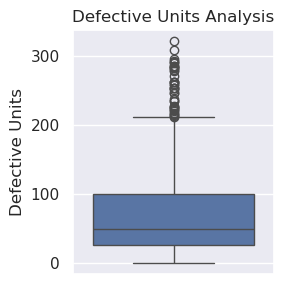

In [129]:
# 5. Defective Units Analysis
plt.figure(figsize=(3,3))
sns.boxplot(data=df, y='Defective_Units')
plt.title('Defective Units Analysis')
plt.ylabel('Defective Units')
plt.tight_layout()

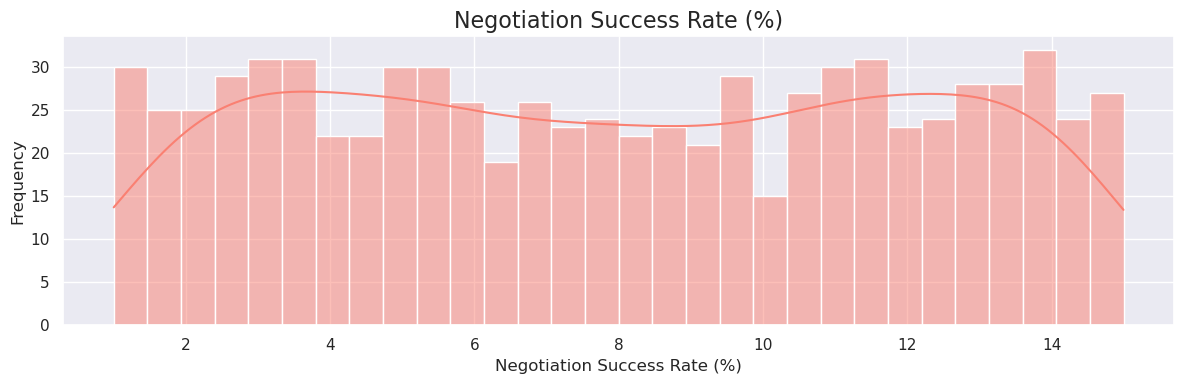

In [165]:
# 6. Negotiated Price vs Unit Price Comparison
# Calculate the percentage of the discounted price 
df['Negotiation_Success_Rate'] = (df['Unit_Price'] - df['Negotiated_Price'])/df['Unit_Price']*100

plt.figure(figsize=(12,4))
sns.histplot(df['Negotiation_Success_Rate'], bins=30, kde=True, color='salmon', palette='viridis')
plt.title('Negotiation Success Rate (%)', fontsize=16)
plt.xlabel('Negotiation Success Rate (%)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

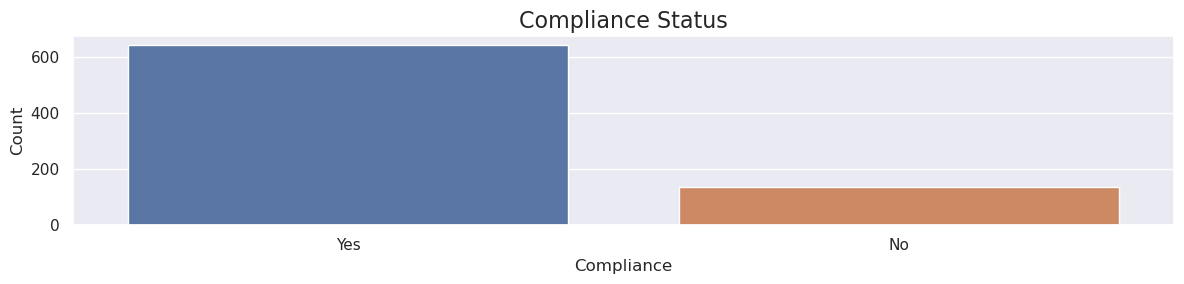

In [166]:
# 7. Compliance Status Count
plt.figure(figsize=(12,3))
sns.countplot(data=df, x='Compliance', hue=df['Compliance'])
plt.title('Compliance Status', fontsize=16)
plt.xlabel('Compliance')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

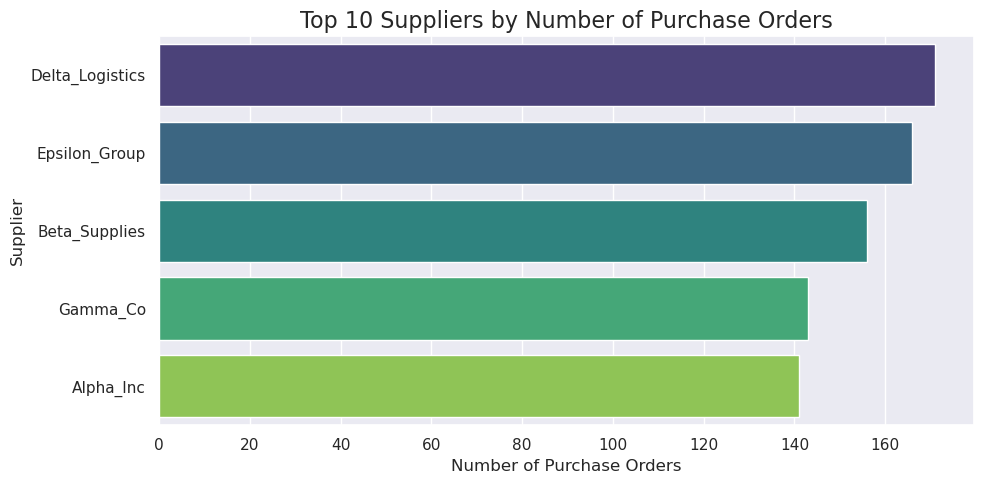

In [169]:
# 8. Top Suppliers by Number of POs
top_suppliers = df['Supplier'].value_counts().head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=top_suppliers.values, y=top_suppliers.index, palette='viridis')
plt.title('Top 10 Suppliers by Number of Purchase Orders', fontsize=16)
plt.xlabel('Number of Purchase Orders')
plt.ylabel('Supplier')
plt.tight_layout()
plt.show()

# Predictive Modeling

## Library Imports

In [180]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report

In [185]:
# ML Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

## Modelling

In [186]:
# 1. Convert Dates
df['Order_Date'] = pd.to_datetime(df['Order_Date'])
df['Delivery_Date'] = pd.to_datetime(df['Delivery_Date'])

# 2. Feature Engineering: Create 'Lead_Time_Days'
df['Lead_Time_Days'] = (df['Delivery_Date'] - df['Order_Date']).dt.days

# 3. Drop unnecessary columns
df.drop(['PO_ID', 'Order_Date', 'Delivery_Date'], axis=1, inplace=True)

# 4. Fill missing values (if any)
df.fillna(0, inplace=True)

In [196]:
df.describe()

,Supplier,Item_Category,Order_Status,Quantity,Unit_Price,Negotiated_Price,Defective_Units,Compliance,Lead_Time_Days,Percentage_Discount_Rate,Negotiation_Success_Rate
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000
mean,2.018018,1.945946,1.221364,1094.660232,58.283822,53.660721,61.710425,0.823681,9.570142,7.968088,7.968088
std,1.370599,1.378092,0.737373,647.844551,28.101315,26.094930,68.971194,0.381337,6.380183,4.138690,4.138690
min,0.000000,0.000000,0.000000,51.000000,10.840000,9.270000,0.000000,0.000000,-5.000000,1.005414,1.005414
25%,1.000000,1.000000,1.000000,615.000000,33.290000,30.460000,11.000000,1.000000,4.000000,4.279701,4.279701
50%,2.000000,2.000000,1.000000,1075.000000,58.950000,53.800000,38.000000,1.000000,10.000000,7.900498,7.900498
75%,3.000000,3.000000,1.000000,1548.000000,83.130000,76.550000,85.000000,1.000000,15.000000,11.528384,11.528384
max,4.000000,4.000000,3.000000,5000.000000,109.170000,107.390000,321.000000,1.000000,20.000000,14.992548,14.992548


In [189]:
# 5. Label Encoding for categorical columns
cat_cols = df.select_dtypes(include='object').columns
le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col])

# 6. Features and Target
X = df.drop('Order_Status', axis=1)  # Features
y = df['Order_Status']               # Target (Encoded)

# 7. Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [193]:
lgb_params = {
    'objective': 'regression',
    'verbosity': -1,  # suppress all LightGBM warnings and info logs
    'min_data_in_leaf': 20,  # tweak if needed
    # other parameters...
}



Model: Logistic Regression
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         8
           1       0.78      1.00      0.88       122
           2       0.00      0.00      0.00        15
           3       0.00      0.00      0.00        11

    accuracy                           0.78       156
   macro avg       0.20      0.25      0.22       156
weighted avg       0.61      0.78      0.69       156



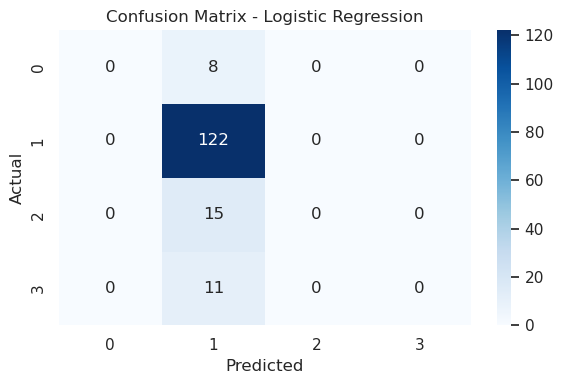


Model: Decision Tree
              precision    recall  f1-score   support

           0       0.09      0.12      0.11         8
           1       0.80      0.67      0.73       122
           2       0.17      0.20      0.18        15
           3       0.17      0.36      0.23        11

    accuracy                           0.58       156
   macro avg       0.31      0.34      0.31       156
weighted avg       0.66      0.58      0.61       156



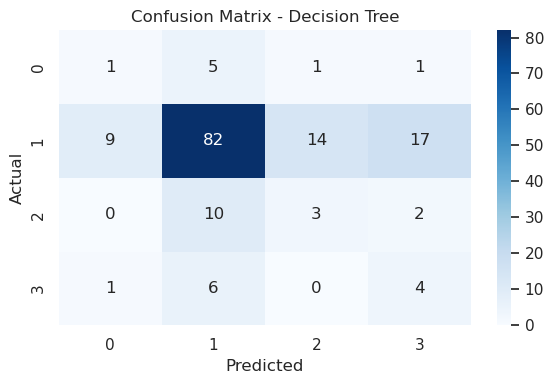


Model: Random Forest
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         8
           1       0.79      1.00      0.88       122
           2       1.00      0.07      0.12        15
           3       0.00      0.00      0.00        11

    accuracy                           0.79       156
   macro avg       0.45      0.27      0.25       156
weighted avg       0.71      0.79      0.70       156



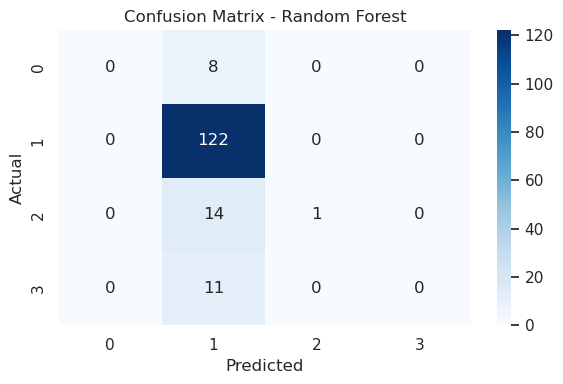


Model: Gradient Boosting
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         8
           1       0.79      0.95      0.87       122
           2       0.25      0.07      0.11        15
           3       0.00      0.00      0.00        11

    accuracy                           0.75       156
   macro avg       0.26      0.25      0.24       156
weighted avg       0.65      0.75      0.69       156



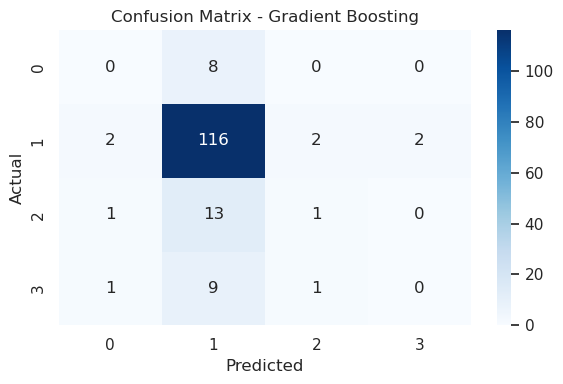


Model: AdaBoost
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         8
           1       0.78      1.00      0.88       122
           2       0.00      0.00      0.00        15
           3       0.00      0.00      0.00        11

    accuracy                           0.78       156
   macro avg       0.20      0.25      0.22       156
weighted avg       0.61      0.78      0.69       156



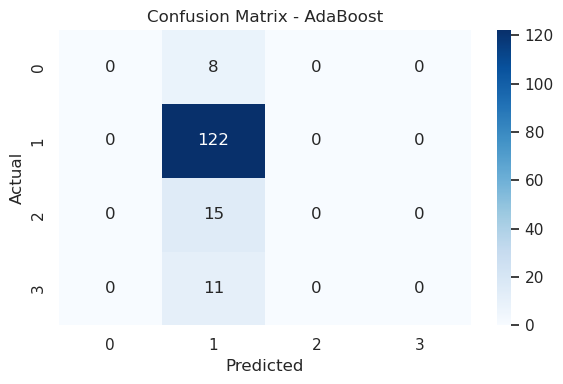


Model: Support Vector Machine
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         8
           1       0.78      1.00      0.88       122
           2       0.00      0.00      0.00        15
           3       0.00      0.00      0.00        11

    accuracy                           0.78       156
   macro avg       0.20      0.25      0.22       156
weighted avg       0.61      0.78      0.69       156



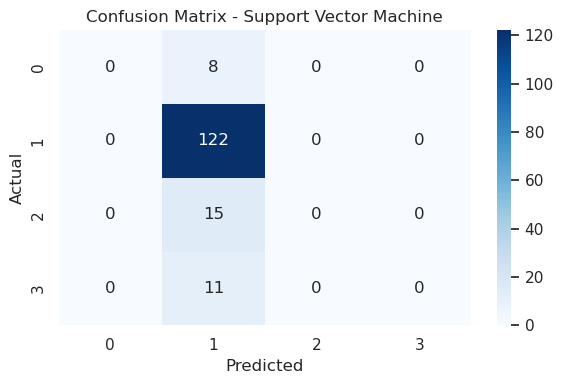


Model: K-Nearest Neighbors
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         8
           1       0.79      0.94      0.86       122
           2       0.00      0.00      0.00        15
           3       0.00      0.00      0.00        11

    accuracy                           0.74       156
   macro avg       0.20      0.24      0.22       156
weighted avg       0.62      0.74      0.67       156



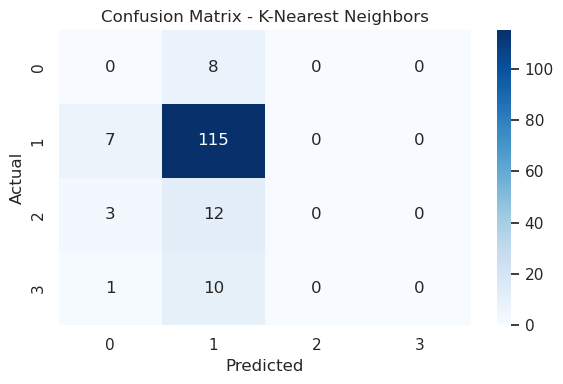


Model: XGBoost
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         8
           1       0.80      0.95      0.87       122
           2       0.00      0.00      0.00        15
           3       0.00      0.00      0.00        11

    accuracy                           0.74       156
   macro avg       0.20      0.24      0.22       156
weighted avg       0.63      0.74      0.68       156



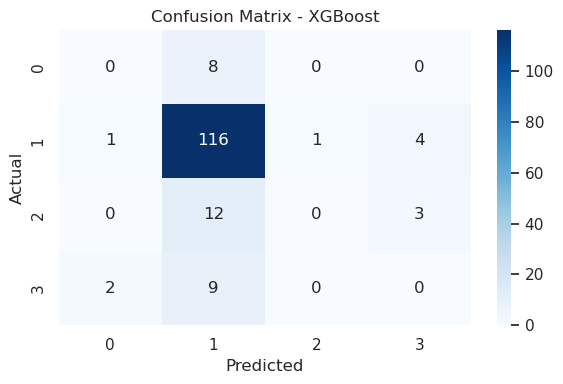

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000162 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1183
[LightGBM] [Info] Number of data points in the train set: 621, number of used features: 10
[LightGBM] [Info] Start training from score -2.423998
[LightGBM] [Info] Start training from score -0.349112
[LightGBM] [Info] Start training from score -2.370888
[LightGBM] [Info] Start training from score -2.182836
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with pos

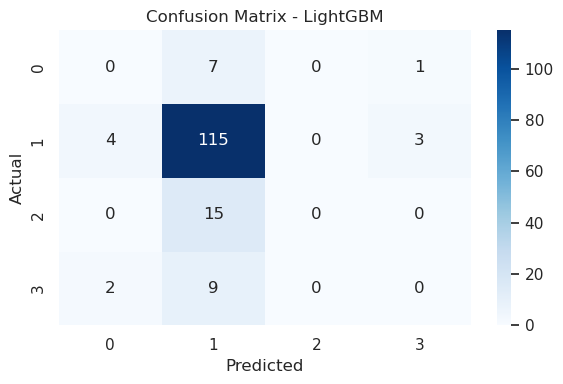

In [192]:
# --- Function for Model Training & Evaluation ---
def train_and_evaluate(model, model_name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print(f"\nModel: {model_name}")
    print(classification_report(y_test, y_pred))

    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.tight_layout()
    plt.show()

# --- Models to Train ---
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "Support Vector Machine": SVC(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "XGBoost": XGBClassifier(eval_metric='logloss'),
    "LightGBM": LGBMClassifier()
}

# --- Train and Evaluate All Models ---
for model_name, model in models.items():
    train_and_evaluate(model, model_name)